# Splitting and Modelling

In [1]:
import csv
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# Extracting 
text = []
label = []

with open('../Data/text_processed.csv', 'r') as f:
    reader = csv.reader(f, delimiter=',')
    header = 0
    for row in reader: 
        text.append((row[0],row[1]))
        label.append(row[2])
        
text = text[1:]
label = label[1:]

## Splitting Training and Test Data

In [3]:
x_train, x_test, y_train, y_test = train_test_split(text, label)

print("Train Set")
print("SPAM:", y_train.count("Spam"))
print("HAM:", y_train.count("Ham"))
print("\n")
print("Test Set")
print("SPAM:", y_test.count("Spam"))
print("HAM:", y_test.count("Ham"))

Train Set
SPAM: 1456
HAM: 287


Test Set
SPAM: 501
HAM: 81


In [4]:
train_set = open("../Data/set_train.csv", "a+", encoding="utf-8")
train_set.write("Image_File,Train_Text,IsSpam\n")

for (x,y) in zip(x_train, y_train):
    train = f"{x[0]},{x[1]},{y}\n"
    train_set.write(train)

In [5]:
test_set = open("../Data/set_test.csv", "a+", encoding="utf-8")
test_set.write("Image_File,Test_Text,IsSpam\n")

for (x,y) in zip(x_test, y_test):
    test = f"{x[0]},{x[1]},{y}\n"
    test_set.write(test)

In [6]:
vectorizer = CountVectorizer(ngram_range=(1,2))

## Training Data

In [7]:
csv_file = open("../Data/set_train.csv", mode='r', encoding="utf-8")
df_train = pd.read_csv(csv_file)
df_train.head()

,Image_File,Train_Text,IsSpam
0,../Data/Processed\Princeton\2454.jpg,orange crisis coca cola nikes minute maid prod...,Spam
1,../Data/Processed\Dredze Spam\724.jpg,symbol gdki price 039 1143 sday target 1,Spam
2,../Data/Processed\Dredze Spam\1786.jpg,noble case jyou regal git 300 boms 6x fist dep...,Spam
3,../Data/Processed\Dredze Spam\864.jpg,headline medical institutional service corp la...,Spam
4,../Data/Processed\Dredze Spam\754.jpg,swiss elegant replica watch rolex tag heuer om...,Spam


In [8]:
# Fit-transform on training data
matrix_train = vectorizer.fit_transform(df_train['Train_Text'].values.astype('U'))
matrix_train 

<1728x91323 sparse matrix of type '<class 'numpy.int64'>'
	with 209189 stored elements in Compressed Sparse Row format>

In [9]:
# Vectorizing training data
train_set = pd.DataFrame(matrix_train.toarray(),columns=vectorizer.get_feature_names_out())
train_set

,00,00 24800000,00 390,00 482000,00 critical,00 customer,00 eaghondai,00 fnancig,00 heres,00 herest,...,zusammenarbeit amemberof,zusfluh,zusfluh vollered,zy,zy century,zy valium,zyban,zyban 30,zyban ew,zyban prevacid
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1724,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1725,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1726,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# Saving a copy of vectorized training data
x_train = train_set[:].copy()

# Join feature columns with original dataframe
df_text = df_train.pop('Train_Text')
y_train = df_train.pop('IsSpam')
train_set.insert(0, "Train_Text", df_text, True)
train_set['IsSpam'] = y_train
train_set.head()

,Train_Text,00,00 24800000,00 390,00 482000,00 critical,00 customer,00 eaghondai,00 fnancig,00 heres,...,zusfluh,zusfluh vollered,zy,zy century,zy valium,zyban,zyban 30,zyban ew,zyban prevacid,IsSpam
0,orange crisis coca cola nikes minute maid prod...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Spam
1,symbol gdki price 039 1143 sday target 1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Spam
2,noble case jyou regal git 300 boms 6x fist dep...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Spam
3,headline medical institutional service corp la...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Spam
4,swiss elegant replica watch rolex tag heuer om...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Spam


## Test Data

In [11]:
csv_file = open("../Data/set_test.csv", mode='r', encoding="utf-8")
df_test = pd.read_csv(csv_file)
df_test.head()

,Image_File,Test_Text,IsSpam
0,../Data/Processed\Dredze Spam\2256.jpg,egyf hot stock attention energy finders egyf a...,Spam
1,../Data/Processed\Dredze Spam\1289.jpg,ce ee ee ee ee gchhh absolutely amaze watch do...,Spam
2,../Data/Processed\Dredze Spam\1975.jpg,ia allhomeowners approvedregarless ofcredit aa...,Spam
3,../Data/Processed\Dredze Spam\675.jpg,dont leave millions men benefit pheromons attr...,Spam
4,../Data/Processed\Dredze Ham\86.jpg,cy seers,Ham


In [12]:
# Transform on test data
matrix_test = vectorizer.transform(df_test['Test_Text'].values.astype('U'))
matrix_test

<549x91323 sparse matrix of type '<class 'numpy.int64'>'
	with 42960 stored elements in Compressed Sparse Row format>

In [13]:
# Vectorizing test data
test_set = pd.DataFrame(matrix_test.toarray(),columns=vectorizer.get_feature_names_out())
test_set

,00,00 24800000,00 390,00 482000,00 critical,00 customer,00 eaghondai,00 fnancig,00 heres,00 herest,...,zusammenarbeit amemberof,zusfluh,zusfluh vollered,zy,zy century,zy valium,zyban,zyban 30,zyban ew,zyban prevacid
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
545,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
546,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
547,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# Saving a copy of vectorized test data
x_test = test_set[:].copy()

# Join feature columns with original dataframe
df_text = df_test.pop('Test_Text')
y_test = df_test.pop('IsSpam')
test_set.insert(0, "Test_Text", df_text, True)
test_set['IsSpam'] = y_test

test_set.head()

,Test_Text,00,00 24800000,00 390,00 482000,00 critical,00 customer,00 eaghondai,00 fnancig,00 heres,...,zusfluh,zusfluh vollered,zy,zy century,zy valium,zyban,zyban 30,zyban ew,zyban prevacid,IsSpam
0,egyf hot stock attention energy finders egyf a...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Spam
1,ce ee ee ee ee gchhh absolutely amaze watch do...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Spam
2,ia allhomeowners approvedregarless ofcredit aa...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Spam
3,dont leave millions men benefit pheromons attr...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Spam
4,cy seers,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Ham


## Smote

In [15]:
counter = Counter(y_train)
print('Before', counter)

smt = SMOTE()

x_train_sm, y_train_sm = smt.fit_resample(x_train, y_train)

counter = Counter(y_train_sm)
print('After', counter)

Before Counter({'Spam': 1443, 'Ham': 285})
After Counter({'Spam': 1443, 'Ham': 1443})


## Model: Decision Tree

### Without Smote:

In [16]:
# Train and Test on Decision Tree
clf = DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

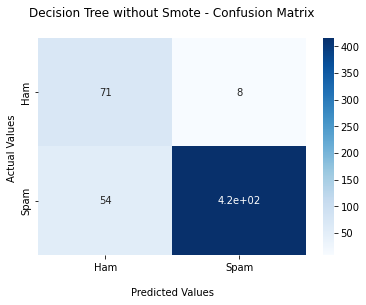

In [17]:
# Showing confusion matrix
dt_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(dt_matrix, annot=True, cmap='Blues')

ax.set_title('Decision Tree without Smote - Confusion Matrix\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Ham','Spam'])
ax.yaxis.set_ticklabels(['Ham','Spam'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [18]:
# Showing classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         Ham       0.57      0.90      0.70        79
        Spam       0.98      0.89      0.93       470

    accuracy                           0.89       549
   macro avg       0.77      0.89      0.81       549
weighted avg       0.92      0.89      0.90       549



### With Smote:

In [19]:
# Train and Test on Decision Tree
clf = DecisionTreeClassifier()
clf = clf.fit(x_train_sm,y_train_sm)
y_pred_sm = clf.predict(x_test)

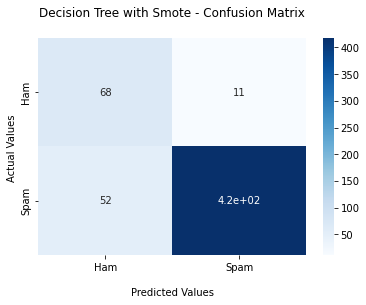

In [20]:
# Showing confusion matrix
dt_matrix = confusion_matrix(y_test, y_pred_sm)
ax = sns.heatmap(dt_matrix, annot=True, cmap='Blues')

ax.set_title('Decision Tree with Smote - Confusion Matrix\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Ham','Spam'])
ax.yaxis.set_ticklabels(['Ham','Spam'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [21]:
# Showing classification report
print(classification_report(y_test,y_pred_sm))

              precision    recall  f1-score   support

         Ham       0.57      0.86      0.68        79
        Spam       0.97      0.89      0.93       470

    accuracy                           0.89       549
   macro avg       0.77      0.88      0.81       549
weighted avg       0.92      0.89      0.89       549



## Model: Neural Network

### Without Smote:

In [22]:
# Data Preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fitting to the training data
scaler.fit(x_train)

# Applying transformations to the data
X_train = scaler.transform(x_train)
X_test = scaler.transform(x_test)

In [23]:
# Training the Model
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))
mlp.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(30, 30, 30))

In [24]:
# Testing the Model
predictions = mlp.predict(X_test)

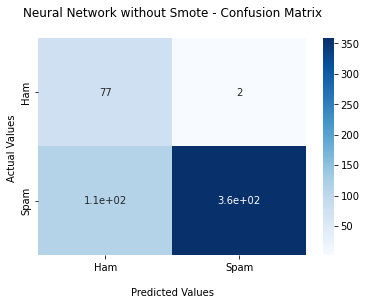

In [25]:
# Showing confusion matrix
nn_matrix = confusion_matrix(y_test, predictions)
ax = sns.heatmap(nn_matrix, annot=True, cmap='Blues')

ax.set_title('Neural Network without Smote - Confusion Matrix\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Ham','Spam'])
ax.yaxis.set_ticklabels(['Ham','Spam'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [26]:
# Showing classification report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         Ham       0.41      0.97      0.58        79
        Spam       0.99      0.76      0.86       470

    accuracy                           0.79       549
   macro avg       0.70      0.87      0.72       549
weighted avg       0.91      0.79      0.82       549



### With Smote:

In [27]:
# Data Preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fitting to the training data
scaler.fit(x_train_sm)

# Applying transformations to the data
X_train_sm = scaler.transform(x_train_sm)
X_test_sm = scaler.transform(x_test)

In [28]:
# Training the Model
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))
mlp.fit(X_train_sm,y_train_sm)

MLPClassifier(hidden_layer_sizes=(30, 30, 30))

In [29]:
# Testing the Model
predictions_sm = mlp.predict(X_test_sm)

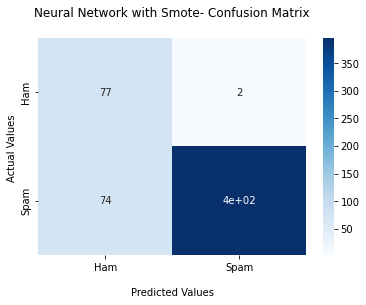

In [30]:
# Showing confusion matrix
nn_matrix = confusion_matrix(y_test, predictions_sm)
ax = sns.heatmap(nn_matrix, annot=True, cmap='Blues')

ax.set_title('Neural Network with Smote- Confusion Matrix\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Ham','Spam'])
ax.yaxis.set_ticklabels(['Ham','Spam'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [31]:
# Showing classification report
print(classification_report(y_test,predictions_sm))

              precision    recall  f1-score   support

         Ham       0.51      0.97      0.67        79
        Spam       0.99      0.84      0.91       470

    accuracy                           0.86       549
   macro avg       0.75      0.91      0.79       549
weighted avg       0.93      0.86      0.88       549

